## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **Importing the dataset**

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load all the dataset 
rossmann_stores = pd.read_csv(r"/content/drive/MyDrive/Data_Science/Capstone_Projects/REGRESSION/Rossmann Stores Data.csv")
stores_df = pd.read_csv(r"/content/drive/MyDrive/Data_Science/Capstone_Projects/REGRESSION/store.csv")

# **Dataset Inspection**

In [ ]:
# Explore the details of rossmann_stores file
print("******The rossmann_stores csv file*******\n")
print(rossmann_stores.info())
print('-'* 100)
print("******The sample data of rossmann_stores csv file******")
rossmann_stores.head(10)

******The rossmann_stores csv file*******

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
----------------------------------------------------------------------------------------------------
******The sample data of rossmann_stores csv file******


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [ ]:
# Explore the details of Stores csv file
print("*********8The Stores csv file************ \n \n")
print(stores_df.info())
print('-'* 100)
print("*********The sample data of stores csv file*********\n\n")
stores_df.head(10)

*********8The Stores csv file************ 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None
----------------------------------------------------------------------------------------------------
******

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN



*  From the Rossmann_stores file , we can able to observe that , it contains daily sales data of each store
*  While stores csv file, contains 1115 rossmann stores details - store type, store promotional activities, nearest competetive store details

In [ ]:
# Merge the (Rossmann_stores file,stores csv file) with unique variable in both the files- 'Store'
df = pd.merge(rossmann_stores,stores_df,on= 'Store',how='left')

In [ ]:
df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,NaN
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,NaN


In [ ]:
# Explore the dataset - Rossmann Stores
print("****Rossmann Stores****\n")
print(df.info())
print('-'* 100)
print("****The sample data Rossmann Stores sales****")
df.head(3)

****Rossmann Stores****

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
# Convert column Date-object to Datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Extract Day,month,year from the column 'Date
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.to_datetime(df['Date']).dt.day
df['week'] = pd.to_datetime(df['Date']).dt.week

In [ ]:
# To avoid multicolinearity, column' date' is removed from the dataset
df.drop(['Date'],axis=1,inplace=True)

# **Handling Missing Values**

In [ ]:
# To check for duplicate rows
df.duplicated().sum()

0

In [ ]:
# To check null values in each column
df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
day                               0
week                              0
dtype: int64

In [ ]:
# Fill all the null values with Mean,Median 
df['CompetitionDistance']=df['CompetitionDistance'].fillna(df.groupby('StoreType')['CompetitionDistance'].transform('mean'))  # Nan values are replaced with mean
df['CompetitionOpenSinceMonth']=df['CompetitionOpenSinceMonth'].fillna(df.groupby('StoreType')['CompetitionOpenSinceMonth'].transform('median')) # Nan values are replaced with mean because of outliers
df['CompetitionOpenSinceYear']=df['CompetitionOpenSinceYear'].fillna(df.groupby('StoreType')['CompetitionOpenSinceYear'].transform('median'))# Nan values are replaced with mean because of outliers
df['Promo2SinceWeek']=df['Promo2SinceWeek'].fillna(0) # Filled with 0s because promo2 is not applied for that store
df['Promo2SinceYear']=df['Promo2SinceYear'].fillna(0) # Filled with 0s because promo2 is not applied for that store
df['PromoInterval']=df['PromoInterval'].fillna(0)# Filled with 0s because promo2 is not applied for that store

In [ ]:
# To visualize store open/closed based on store type
df.groupby(['StoreType','Open']).Store.nunique()

StoreType  Open
a          0       602
           1       602
b          0         7
           1        17
c          0       148
           1       148
d          0       348
           1       348
Name: Store, dtype: int64

In [ ]:
# Remove all the stores which are closed from the dataset
df = df[df['Open']==1]

 Rossman clearly stated that they were undergoing refurbishments , so store may be closed, so to reduce bias , we will analyse only open stores since a close store yield a profit of 0.

In [ ]:
df.shape

(844392, 21)

# **Feature Extraction**

We will extract some useful features from our dataset
 - SalesperCustomer - To determine how many sales per customer
 - CompetitionDist_Cat - To group the competition store 
 - Promo2Open - To determine since how many months promo-2 is open
 - CompetitionOpen - To determine since how many months Competition Open is open
 - isPromoMonth - To determine whether the sale is happened in promo month.

## SalesperCustomer

In [ ]:
# SalesperCustomer - To determine how many sales per customer
df['SalesperCustomer']=df['Sales']/df['Customers']

In [ ]:
df['SalesperCustomer'] = df['SalesperCustomer'].fillna(0)

## CompetitionDist_Cat

In [ ]:
# CompetitionOpen - To determine since how many months Competition Open is open
df['CompetitionDist_Cat']=pd.cut(df['CompetitionDistance'], 10)

## Promo2Open

In [ ]:
# Feature extraction # 'Promo2Open' and 'CompetitionOpen' -  To visuaize how promo2 and competition open is impacting the sales 
df['Promo2Open'] = 12 * ((df['year'] - df['Promo2SinceYear']) + (df['week'] - df['Promo2SinceWeek']))/float(4) # Promo2open column shows since how many months promo 2 is open for that perticular sale day 
df['Promo2Open'] = df['Promo2Open'].apply(lambda x: x if x < 500 and x > 0 else 0)

## CompetitionOpen

In [ ]:
df['CompetitionOpen'] = 12 * (df['year'] - df['CompetitionOpenSinceYear']) + (df['month'] - df['CompetitionOpenSinceMonth']) # Competition open column shows since how many months comepetitor store opened nearby
df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x: x if x > 0 else 0)

## isPromoMonth

In [ ]:
# To convert month number to name of the month
import calendar
df['MonthName']=df['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
# To check whether sale happened due to promo
df['isPromoMonth'] = df.apply(lambda x: 1 if str(x.MonthName) in str(x.PromoInterval) else 0,axis =1)

In [ ]:
# To visualize the dataframe
pd.set_option('display.max_columns', None)
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,week,SalesperCustomer,CompetitionDist_Cat,Promo2Open,CompetitionOpen,MonthName,isPromoMonth
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31,9.482883,"(-55.84, 7604.0]",0.0,82.0,Jul,0
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,9.702400,"(-55.84, 7604.0]",69.0,92.0,Jul,1
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,10.126675,"(7604.0, 15188.0]",63.0,103.0,Jul,1
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31,9.342457,"(-55.84, 7604.0]",0.0,70.0,Jul,0
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31,8.626118,"(22772.0, 30356.0]",0.0,3.0,Jul,0


In [ ]:
# Check for null values
df.isna().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
year                         0
month                        0
day                          0
week                         0
SalesperCustomer             0
CompetitionDist_Cat          0
Promo2Open                   0
CompetitionOpen              0
MonthName                    0
isPromoMonth                 0
dtype: int64

As we derived promo2open , competition open from 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionDist_Cat','MonthName'. We can remove these column to avoid multicolinearity

In [ ]:
# drop some columns to avoid multicollinearity
df = df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval','MonthName'],axis = 1)

# **Exploratory Data Analysis**

## Store vs customers/sales

[Text(0.5, 1.0, 'Average sales per customers per store type')]

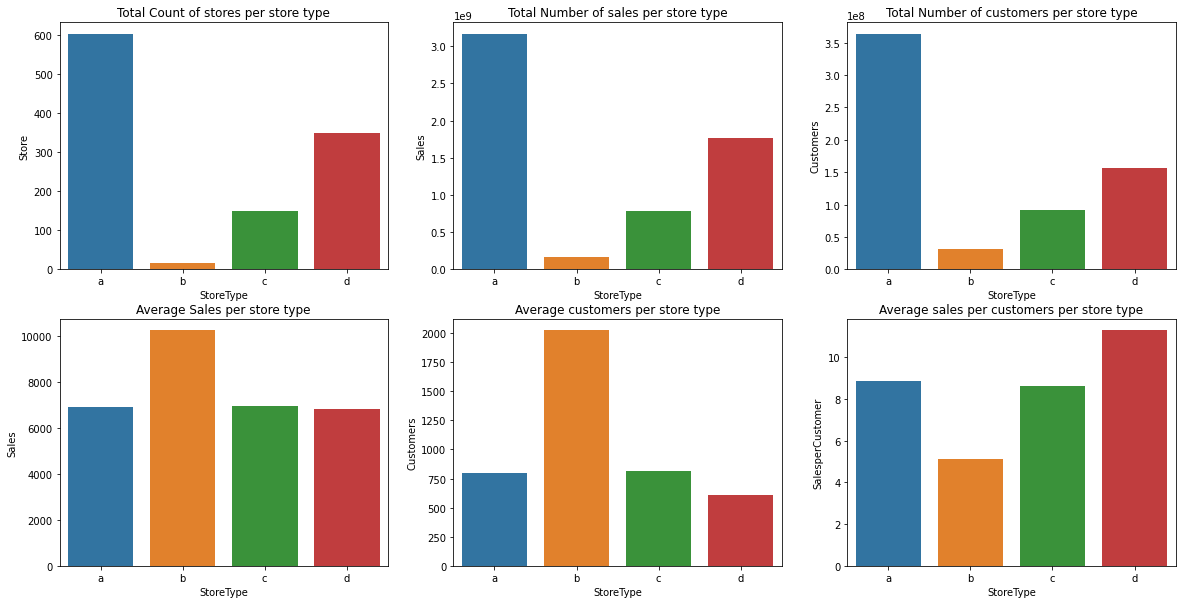

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot(x= df.groupby(by="StoreType").Store.count().index,y = df.groupby(by="StoreType").Store.nunique()).set(title='Total Count of stores per store type')
plt.subplot(2,3,2)
sns.barplot(x=df.groupby(by="StoreType").Sales.sum().index,y = df.groupby(by="StoreType").Sales.sum()).set(title='Total Number of sales per store type')
plt.subplot(2,3,3)
sns.barplot(x=df.groupby(by="StoreType").Customers.sum().index,y = df.groupby(by="StoreType").Customers.sum()).set(title='Total Number of customers per store type')
plt.subplot(2,3,4)
sns.barplot(x=df.groupby(by="StoreType").Sales.sum().index,y = df.groupby(by="StoreType").Sales.mean()).set(title='Average Sales per store type')
plt.subplot(2,3,5)
sns.barplot(x=df.groupby(by="StoreType").Customers.sum().index,y = df.groupby(by="StoreType").Customers.mean()).set(title='Average customers per store type')
plt.subplot(2,3,6)
sns.barplot(x=df.groupby(by="StoreType").Customers.sum().index,y = df.groupby(by="StoreType").SalesperCustomer.mean()).set(title='Average sales per customers per store type')



*   Store Type - A has more number of stores and also store A has most number of sales and customers.From this we can find that store type is impacting the sales.
*   We can see similar patterns with the customers column and the Sales column, if the customer increases ,Sales increases



## Sale ,customer vs week day

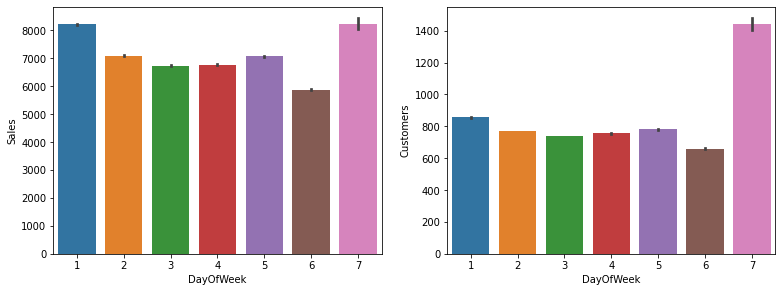

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot(data=df, x ='DayOfWeek',y = 'Sales')
plt.subplot(2,3,2)
sns.barplot(data=df, x= 'DayOfWeek',y = 'Customers')

## Store Assortment

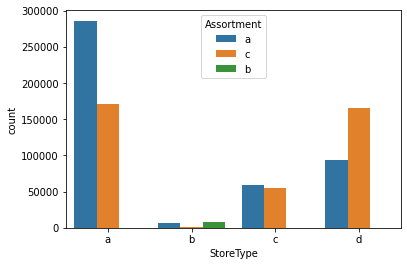

In [ ]:
sns.countplot(data = df, x = "StoreType", hue = "Assortment", order=["a","b","c","d"]) 
plt.show()

We can clearly see here that most of the stores have either assortment type -A  or  assortment type C.


## Store Promotions

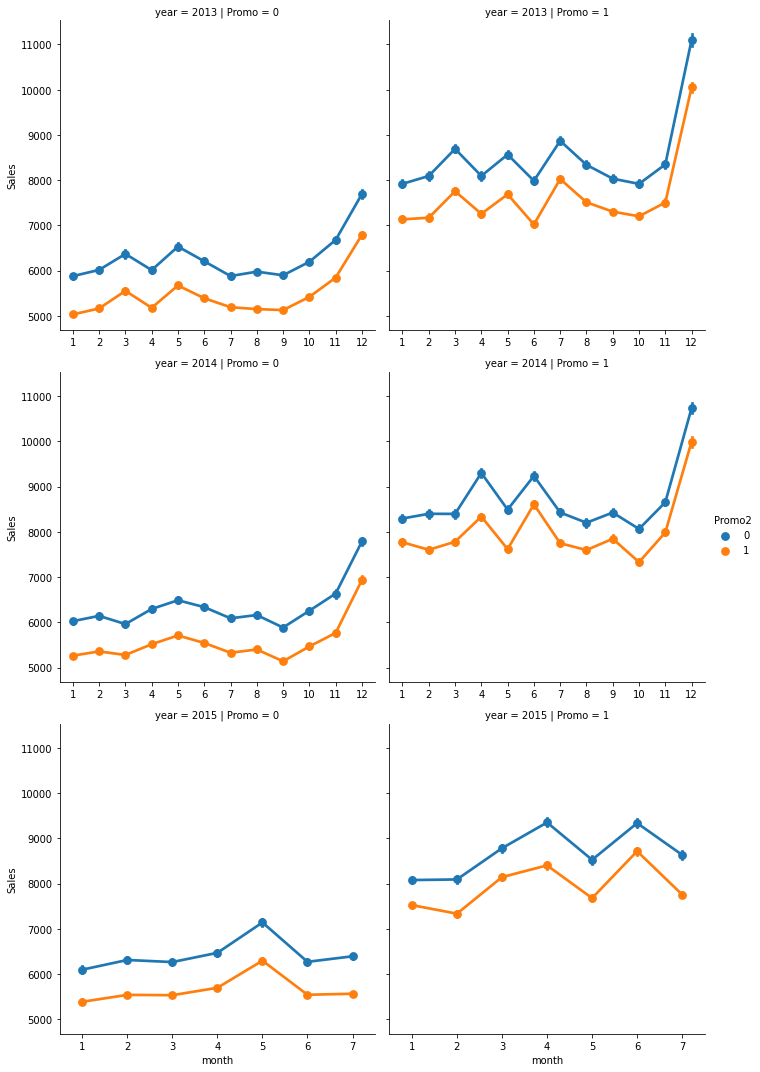

In [ ]:
sns.factorplot(data = df, x ="month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "year"
              ,sharex=False)

*   We see the dramatic change when we compare having promotion Promo=1 to not having promotion Promo=0 and can conclude that a store that have promotion on a given day changes its amount of sales considerably.
*   List item



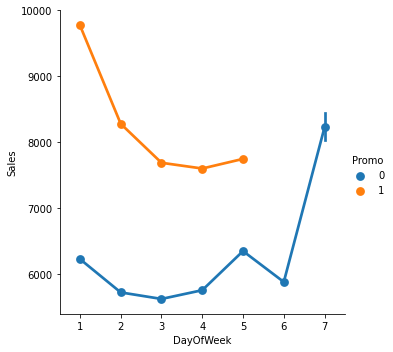

In [ ]:
sns.factorplot(data = df, x ="DayOfWeek", y = "Sales", 
               hue = 'Promo',
              sharex=False)


We see already a big difference again  on a week level (from Monday to Friday) when we seperate promotion and no promotion.We see there are no promotions during the weekend.
For Sunday to have such a high peak is understandable,only 33 stores open on sundays.This clearly shows us how important it is for stores to be opened on Sundays

From all the graphs, we can conclude that all the time there is a peak on Mondays with promotions, a tiny peak on Friday before the weekend and a big peak on Sunday because of closed stores.

## Competition Distance

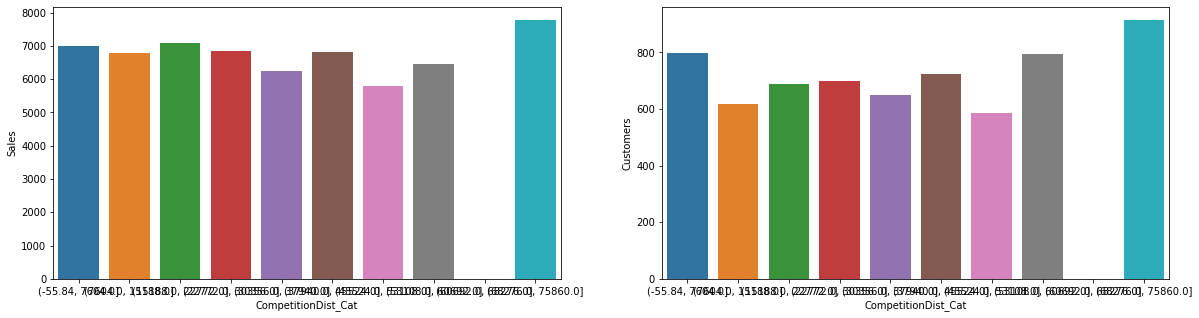

In [ ]:
# To Visualize dataset with repect to Competition Distance
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x= df.groupby(by="CompetitionDist_Cat").Sales.mean().index,y=df.groupby(by="CompetitionDist_Cat").Sales.mean())
plt.subplot(1,2,2)
sns.barplot(x= df.groupby(by="CompetitionDist_Cat").Customers.mean().index,y=df.groupby(by="CompetitionDist_Cat").Customers.mean())

## Holiday vs Sales

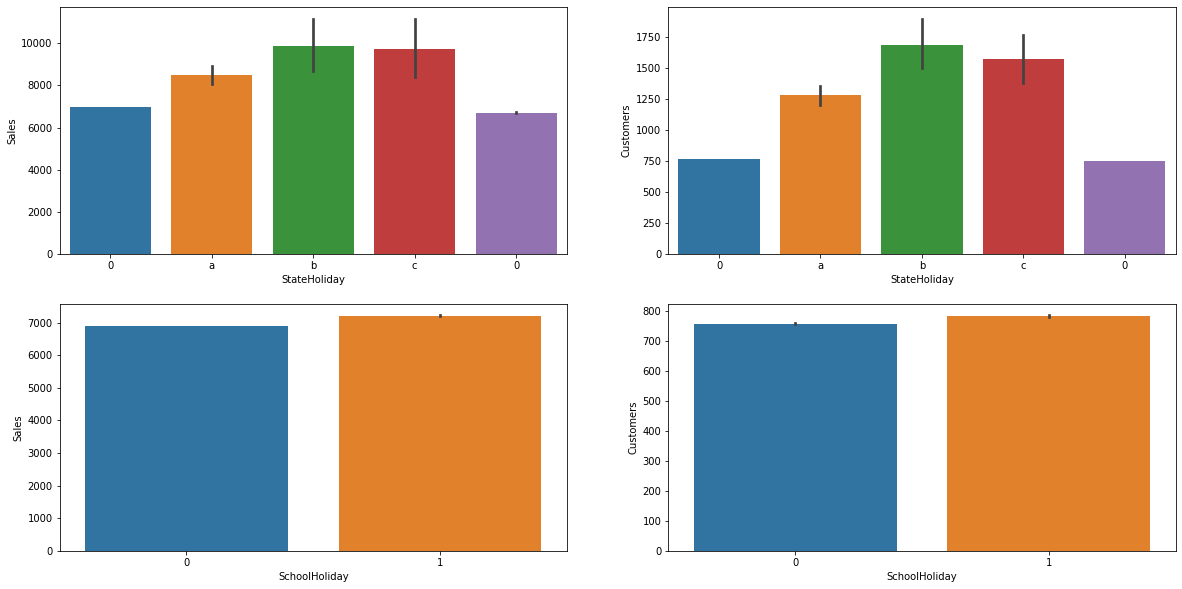

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(data = df , x ='StateHoliday', y='Sales')
plt.subplot(2,2,2)
sns.barplot(data = df , x ='StateHoliday', y='Customers')
plt.subplot(2,2,3)
sns.barplot(data = df , x ='SchoolHoliday', y='Sales')
plt.subplot(2,2,4)
sns.barplot(data = df , x ='SchoolHoliday', y='Customers')

# **preprocessing the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Store                844392 non-null  int64   
 1   DayOfWeek            844392 non-null  int64   
 2   Sales                844392 non-null  int64   
 3   Customers            844392 non-null  int64   
 4   Open                 844392 non-null  int64   
 5   Promo                844392 non-null  int64   
 6   StateHoliday         844392 non-null  object  
 7   SchoolHoliday        844392 non-null  int64   
 8   StoreType            844392 non-null  object  
 9   Assortment           844392 non-null  object  
 10  CompetitionDistance  844392 non-null  float64 
 11  Promo2               844392 non-null  int64   
 12  year                 844392 non-null  int64   
 13  month                844392 non-null  int64   
 14  day                  844392 non-null  int64   
 15 

In [ ]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,day,week,SalesperCustomer,CompetitionDist_Cat,Promo2Open,CompetitionOpen,isPromoMonth
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,2015,7,31,31,9.482883,"(-55.84, 7604.0]",0.0,82.0,0
1,2,5,6064,625,1,1,0,1,a,a,570.0,1,2015,7,31,31,9.702400,"(-55.84, 7604.0]",69.0,92.0,1
2,3,5,8314,821,1,1,0,1,a,a,14130.0,1,2015,7,31,31,10.126675,"(7604.0, 15188.0]",63.0,103.0,1
3,4,5,13995,1498,1,1,0,1,c,c,620.0,0,2015,7,31,31,9.342457,"(-55.84, 7604.0]",0.0,70.0,0
4,5,5,4822,559,1,1,0,1,a,a,29910.0,0,2015,7,31,31,8.626118,"(22772.0, 30356.0]",0.0,3.0,0


## Encoding

In [ ]:
# To determine the unique values in each object -dtype column
for i in df.select_dtypes(include = 'O').describe().columns:
  print("The unique values of",i,'are',df[i].unique())

The unique values of StateHoliday are ['0' 'a' 'b' 'c' 0]
The unique values of StoreType are ['c' 'a' 'd' 'b']
The unique values of Assortment are ['a' 'c' 'b']


In [ ]:
# Label Encoding - replace the string into numerical values
df['StateHoliday'] = df['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1, 0:0})
df['Assortment'] = df['Assortment'].map({'a':1, 'b' : 2, 'c': 3})
df['StoreType'] = df['StoreType'].map({'a':1, 'b' : 2, 'c': 3,'d':4})
# df['PromoInterval'] = df['PromoInterval'].map({0:0,'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,"Mar,Jun,Sept,Dec":3})

## Distribution Analysis

In [ ]:
from scipy import stats
def dist_plot(df, variable):
  plt.figure(figsize=(20,5))

  plt.subplot(1,3,1)
  sns.distplot(df[variable],kde=True)

  plt.subplot(1,3,2)
  sns.boxplot(data=df[variable])

  plt.subplot(1,3,3)
  stats.probplot(df[variable],dist='norm',plot=plt)

def right_skew (df,variable):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  sns.histplot(np.log10(df[variable]),kde=True)

  plt.subplot(1,3,2)
  stats.probplot(np.log10(df[variable]),dist='norm',plot=plt)
  plt.title('Log Transformation')

  plt.subplot(1,3,3)
  sns.boxplot(data=df[variable])


def left_skew (df,variable):
  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  sns.histplot(np.log10(max(df[variable]+1)-df[variable]),kde=True)

  plt.subplot(1,2,2)
  stats.probplot(np.log10(df[variable]),dist='norm',plot=plt)
  plt.title('Log Transformation')
  plt.show()

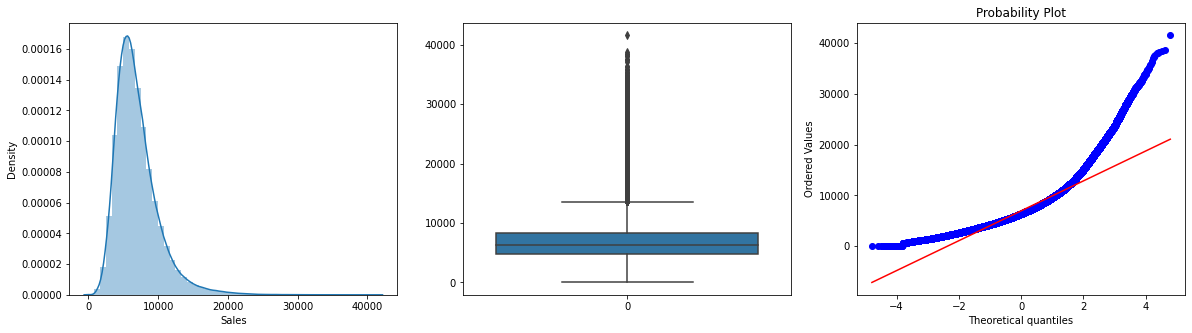

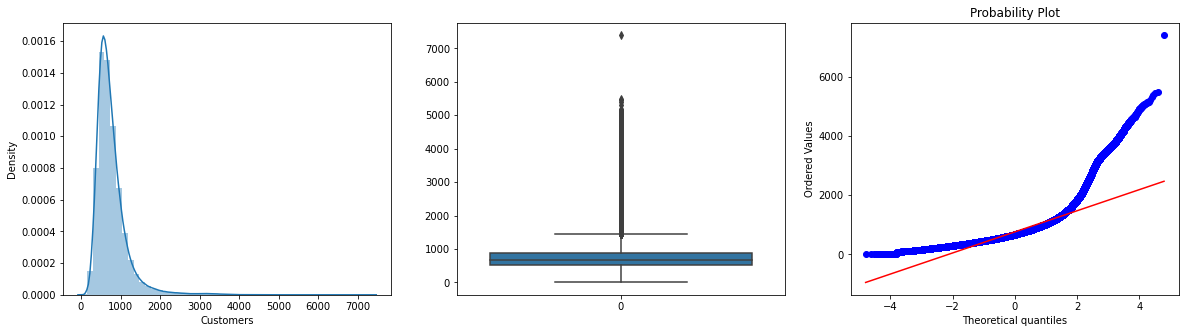

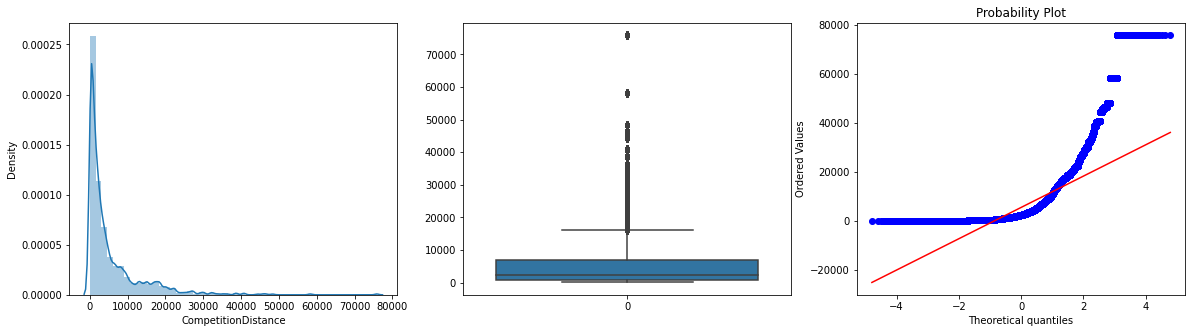

In [ ]:
for i in ['Sales','Customers','CompetitionDistance']:
  dist_plot(df,i)

In [ ]:
print(df['Sales'].mean())
print(df['Sales'].median())

6955.514290755952
6369.0



*  Dependent Variable - 'Sales' has outliers ,The outliers may be because of promotional days or big store or State Holiday. in order to analyze the data we will retain the outliers.
*  The mean of 'Sales' variable is 6955 versus 6369 in median is a very good sign that there are no extravagant values affecting the general distribution of Sales.




## Correlation Analysis

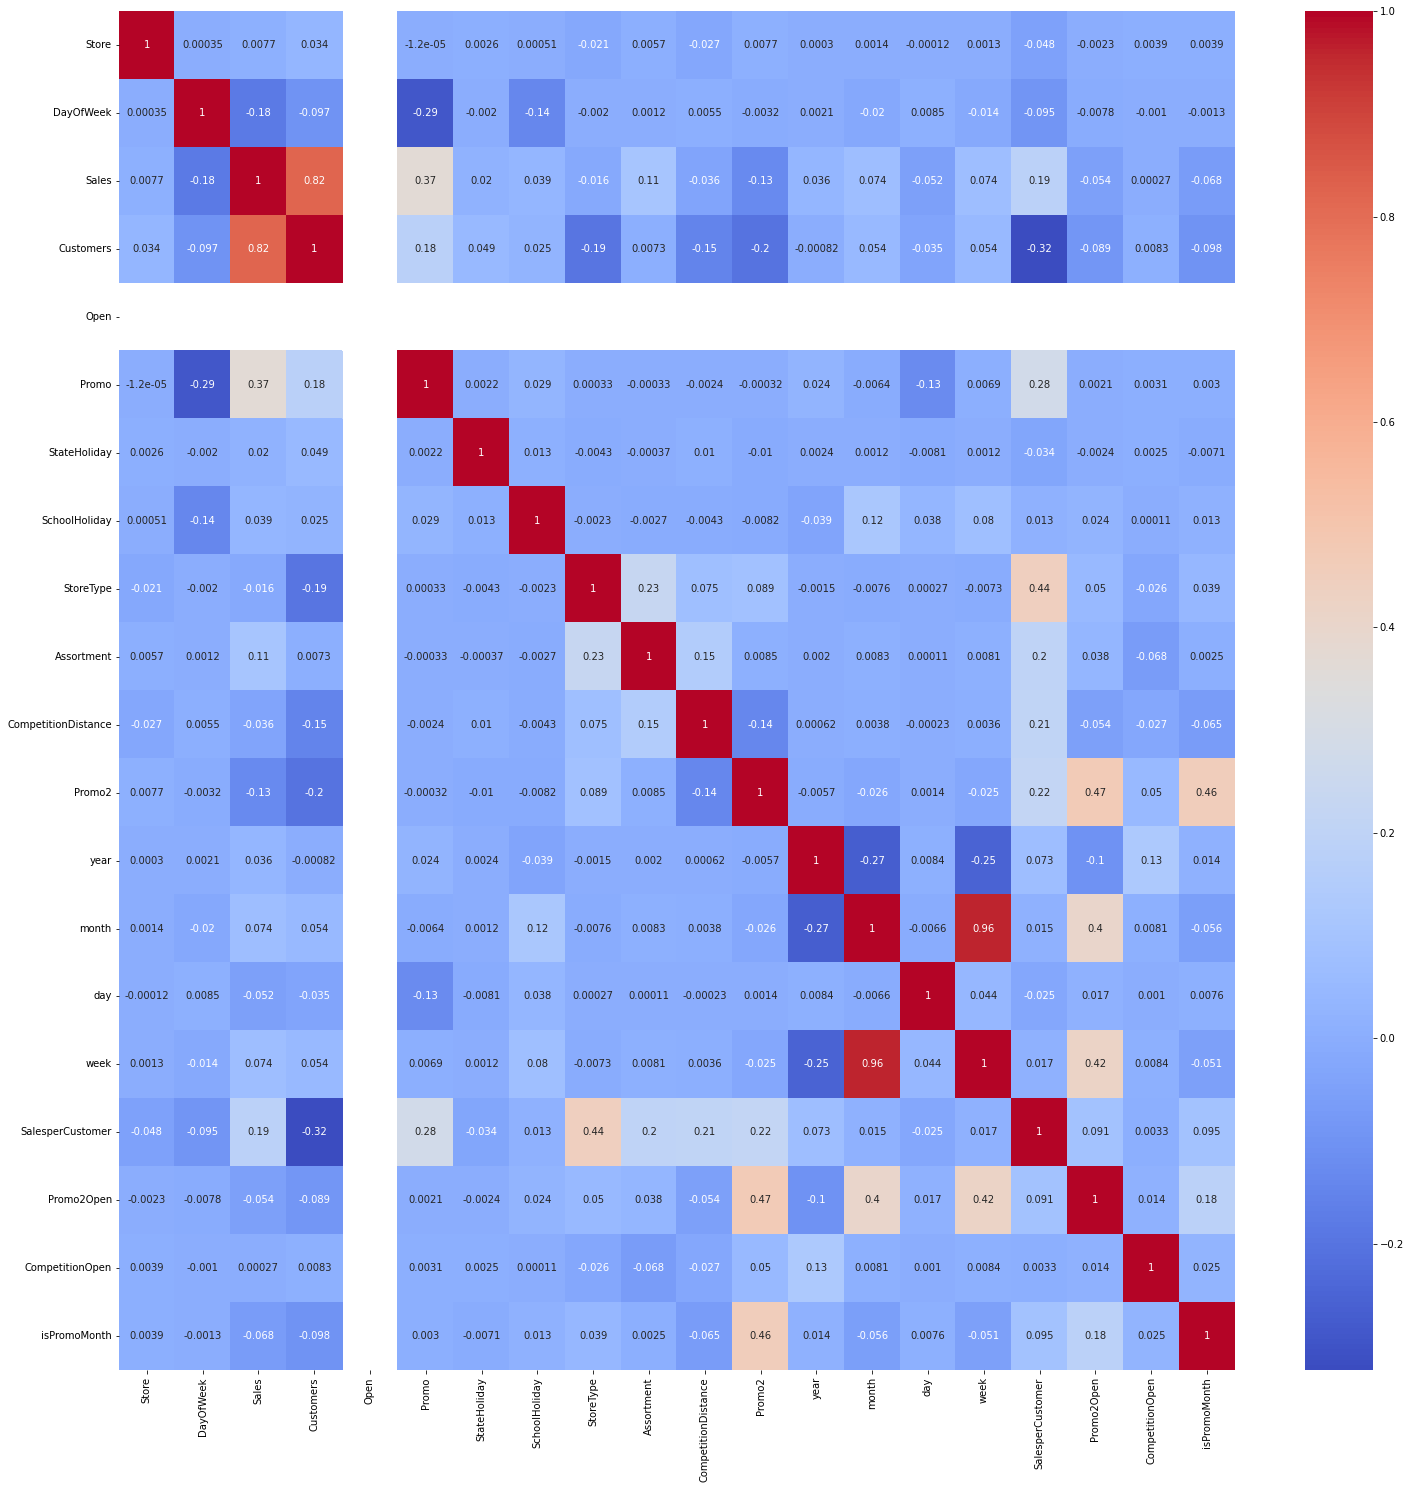

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')



*   It's interesting to see that Sales per Customer and Promo (0.28) actually correlate positively, since running a promotion increases that number .
*   Sales per Customer also correlates with Competition Distance(0.2), in a positive manner





In [ ]:
# To remove all low variance features
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold() # Default Threshold is 0
var.fit(df.select_dtypes(include='number'))

VarianceThreshold()

In [ ]:
# To print all the high variance features
print('The features with high variance are = ', var.get_feature_names_out())

The features with high variance are =  ['Store' 'DayOfWeek' 'Sales' 'Customers' 'Promo' 'StateHoliday'
 'SchoolHoliday' 'StoreType' 'Assortment' 'CompetitionDistance' 'Promo2'
 'year' 'month' 'day' 'week' 'SalesperCustomer' 'Promo2Open'
 'CompetitionOpen' 'isPromoMonth']


In [ ]:
# Low variance features can be removed from the dataset
x=[i for i in df.describe(include='all').columns if i not in list(var.get_feature_names_out())]
x

['Open', 'CompetitionDist_Cat']

In [ ]:
df = df[list(var.get_feature_names_out())] # Removed ['Open', 'CompetitionDist_Cat'] from the dataset

In [ ]:
# To determine the variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):

  vif = pd.DataFrame()
  vif['features']=x.columns
  vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
  return (vif)

In [ ]:
calc_vif(df)

,features,VIF
0,Store,4.027943
1,DayOfWeek,5.812588
2,Sales,70.824199
3,Customers,56.025609
4,Promo,2.437067
5,StateHoliday,1.006385
6,SchoolHoliday,1.309046
7,StoreType,4.873150
8,Assortment,5.323658
9,CompetitionDistance,1.673191


In [ ]:
calc_vif(df[[i for i in df.columns if i not in ['Sales','week','SalesperCustomer','year']]])

,features,VIF
0,Store,3.674998
1,DayOfWeek,4.508147
2,Customers,4.476929
3,Promo,1.937631
4,StateHoliday,1.004035
5,SchoolHoliday,1.277228
6,StoreType,3.695994
7,Assortment,4.913390
8,CompetitionDistance,1.569209
9,Promo2,3.190654


In [ ]:
df.drop(['week','SalesperCustomer'],axis=1,inplace=True)

## Feature Selection

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'year', 'month', 'day', 'Promo2Open', 'CompetitionOpen',
       'isPromoMonth'],
      dtype='object')

In [ ]:
# Dataset contains 8L rows, by considering the time complexity and Ram management , random sampling of 3L rows have been considered 
new_df = df.sample(n=300000,random_state=2) # Number of rows reduced to 3L

In [ ]:
# x- Independent Variable y - dependent Variable
x=new_df.drop(['Sales'],axis = 1)
y=new_df[['Sales']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

# **ML-Regression Model**

## Evaluation Metrics

In [ ]:
# Import Libraries related to regression evaluation metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [ ]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 5.3 MB/s 


Root Mean Squared Percentage Error

-shows better prediction accuracy compared with the regression models

In [ ]:
# Root mean square percentage error
from sktime.performance_metrics.forecasting import     MeanSquaredPercentageError
rmspe = MeanSquaredPercentageError(square_root=True)

In [ ]:
# Regression Evaluation Metrics
def regression_evaluation(x_test,y_test,y_pred):
  print('The mean squared error is = ', mean_squared_error((y_test),(y_pred)))
  print('The mean absolute error is=', mean_absolute_error((y_test),(y_pred)))
  print('The root mean squared error is = ',np.sqrt(mean_squared_error((y_test),(y_pred))))
  print('The R Squared error is = ', r2_score((y_test),(y_pred)))
  print('The adjusted R Squared error is = ',1-(1-r2_score((y_test),(y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
 

In [ ]:
# To visualize the regression evaluation plot
def regression_evaluation_plot (y_test,y_pred):
  plt.figure(figsize=(10,5))
  plt.scatter((y_test), (y_pred))
  plt.xlabel('Actual sales')
  plt.ylabel('Predicted sales')

  plt.figure(figsize=(10,5))
  plt.plot((y_pred))
  plt.plot(np.array((y_test)))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('No of Test Data')
  plt.show()

In [ ]:
# Linear Regression - Assumption check - Residual plot
def residual_plot(y_test,y_pred):
  fig_1 = plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.distplot(((y_test)- (y_pred)),bins=20,color='r')
  fig_1.suptitle('Residual Analysis', fontsize = 20)   
  
  fig_2 = plt.figure(figsize=(10,5))
  plt.subplot(1,2,2)
  plt.scatter((y_pred),(y_test)-(y_pred),c='r')
  plt.xlabel('Sales')
  plt.ylabel('residuals')
  fig_2.suptitle('Homoscadacity', fontsize = 20)

## Linear Regression

In [ ]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# predicting the y values for x_train and xtest
y_pred_train_lr = lr.predict(x_train)
y_pred_test_lr=lr.predict(x_test)

In [ ]:
# Regression Evaluation Metrics
regression_evaluation(x_test,y_test,y_pred_test_lr)

The mean squared error is =  2289199.2478716327
The mean absolute error is= 1044.7074446053011
The root mean squared error is =  1513.0099959589272
The R Squared error is =  0.7664467089303969
The adjusted R Squared error is =  0.7663844104015285


In [ ]:
y_train.values

array([[ 4214],
       [ 3244],
       [ 4172],
       ...,
       [12330],
       [ 5994],
       [ 4908]])

In [ ]:
rmspe(y_train.values,y_pred_train_lr)
rmspe_1(y_test.values,y_pred_test_lr)

5.263859050226102e+16

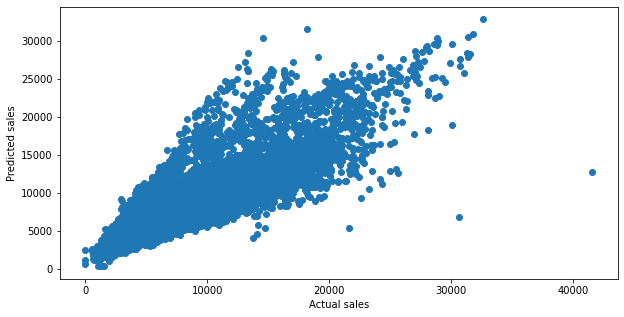

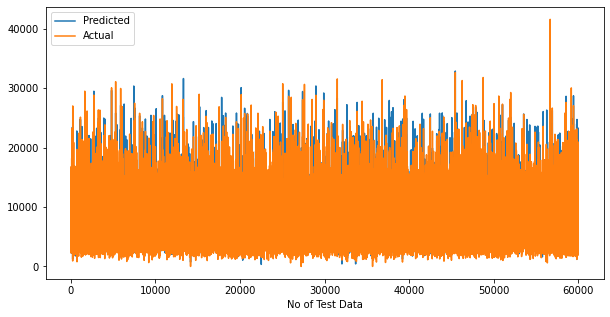

In [ ]:
# Scatter plot for y-test and y_predicted
regression_evaluation_plot(y_test,y_pred_test_lr)

**Normal Distribution of error terms**

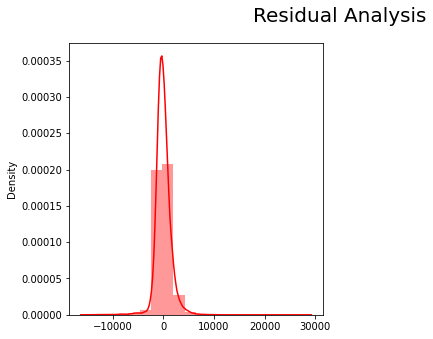

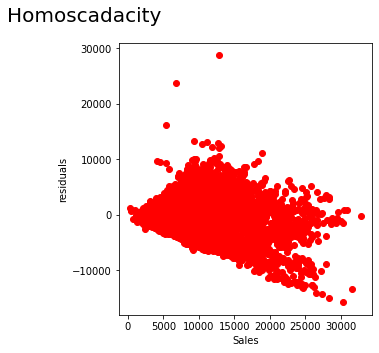

In [ ]:
# Assumption check  - Residual Analysis  - to verify our error value is normally distributed
residual_plot(y_test,y_pred_test_lr)

Residual Analysis shows that error terms are normally distributed,with mean 0
Heteroskedasticity shows that , the variance of the residuals is unequal over a range of measured values

From these we can infer that our model is good.

## Multiple ML Models

A pipeline is created to model multiple regression models- ElasticNet,Decision Tree Regressor,Random Forest Regressor,XGB Regressor.

As the dataset is nearly 8L it is reduced to 3L by random sampling method

In [ ]:
# Pipeline for automation
from sklearn.pipeline import Pipeline
# Scaling ,Random search
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

# Regression Models
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge

In [ ]:
# To scale the numerical columns using standard scaler
num_columns=['Customers','CompetitionDistance',]

In [ ]:
# create a pipeline to sequence of data processing
pipe_dt = Pipeline([('CT',ColumnTransformer([('scl',StandardScaler(),num_columns)],remainder="passthrough")),
                    ('DT',DecisionTreeRegressor(random_state=2))])
pipe_rf = Pipeline([('CT',ColumnTransformer([('scl',StandardScaler(),num_columns)],remainder="passthrough")),
                    ('RF',RandomForestRegressor(random_state=2))])
pipe_xgb = Pipeline([('CT',ColumnTransformer([('scl',StandardScaler(),num_columns)],remainder="passthrough")),
                     ('XGB', XGBRegressor(random_state=2))])
pipe_eln =Pipeline([('CT',ColumnTransformer([('scl',StandardScaler(),num_columns)],remainder="passthrough")),
                     ('ELN', ElasticNet(random_state=2))])
pipe_ls = Pipeline([('CT',ColumnTransformer([('scl',StandardScaler(),num_columns)],remainder="passthrough")),
                     ('LS', Lasso(random_state=2))])
pipe_rg = Pipeline([('CT',ColumnTransformer([('scl',StandardScaler(),num_columns)],remainder="passthrough")),
                     ('RG', Lasso(random_state=2))])

In [ ]:
# Hyper Parameter for various regression models
eln_parameters = {'ELN__alpha':[1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5],
                  'ELN__l1_ratio':[0.3,0.4,0.5,0.6,0.7]} # Elastonet
rf_parameters = {'RF__max_depth': [3,5,7],
                 'RF__min_samples_leaf': [1, 2, 5],
                 'RF__min_samples_split': [3, 5, 9]} # Random Forest Tree
dt_parameters = {'DT__max_depth': [5, 10, 15],
                 'DT__min_samples_leaf': [1, 3, 7],
                 'DT__min_samples_split': [3, 5, 9],
                 'DT__max_leaf_nodes': [5, 20, 100],
                 'DT__max_features': ['auto', 'sqrt', 'log2']} # Decision Tree
xgb_parameters = {'XGB__max_depth': [2, 5, 10],
              'XGB__learning_rate': [0.05, 0.1, 0.2],
              'XGB__min_child_weight': [1, 2, 5],
              'XGB__gamma': [0, 0.1, 0.3],
              'XGB__colsample_bytree': [0.3, 0.5, 0.7]} # XGB Boost
rg_parameters ={'RG__alpha':[1e-15, 1e-13, 1e-12, 1e-9, 1e-7, 1e-3, 1e-2, 1,5]} # Ridge Regression

ls_parameters ={'LS__alpha':[1e-15, 1e-13, 1e-12, 1e-9, 1e-7, 1e-3, 1e-2, 1,5]}# Lasso Regression


In [ ]:
# create various regression models
dt_random_search = RandomizedSearchCV(estimator=pipe_dt,
                                      param_distributions=dt_parameters,
                                      scoring='r2',
                                      cv=2,
                                      verbose=2) # Decision Tree
rf_random_search = RandomizedSearchCV(estimator=pipe_rf,
                                      param_distributions=rf_parameters,
                                      scoring='r2',
                                      cv=2,
                                      verbose=2)# Random Forest Tree
xgb_random_search = RandomizedSearchCV(estimator=pipe_xgb,
                                       param_distributions=xgb_parameters,
                                       scoring='r2',
                                       cv=2,
                                       verbose=2)# XGB Boost
eln_random_search = RandomizedSearchCV(estimator=pipe_eln,
                                       param_distributions=eln_parameters,
                                       scoring='r2',
                                       cv=2,
                                       verbose=2)# Elastonet
ls_random_search = RandomizedSearchCV(estimator=pipe_ls,
                                      param_distributions=ls_parameters,
                                      scoring='r2',
                                      cv=2,
                                      verbose=2)# Lasso Regression
rg_random_search = RandomizedSearchCV(estimator=pipe_rg,
                                      param_distributions=rg_parameters,
                                      scoring='r2',
                                      cv=2,
                                      verbose=2)# Ridge Regression

In [ ]:
# To fit the x_train and y_train in all the regression models
grids = [ dt_random_search, rf_random_search, xgb_random_search, eln_random_search,ls_random_search,rg_random_search]
for pipe in grids:
    pipe.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END DT__max_depth=10, DT__max_features=auto, DT__max_leaf_nodes=100, DT__min_samples_leaf=7, DT__min_samples_split=5; total time=   0.6s
[CV] END DT__max_depth=10, DT__max_features=auto, DT__max_leaf_nodes=100, DT__min_samples_leaf=7, DT__min_samples_split=5; total time=   0.6s
[CV] END DT__max_depth=10, DT__max_features=sqrt, DT__max_leaf_nodes=100, DT__min_samples_leaf=1, DT__min_samples_split=3; total time=   0.2s
[CV] END DT__max_depth=10, DT__max_features=sqrt, DT__max_leaf_nodes=100, DT__min_samples_leaf=1, DT__min_samples_split=3; total time=   0.2s
[CV] END DT__max_depth=5, DT__max_features=log2, DT__max_leaf_nodes=100, DT__min_samples_leaf=7, DT__min_samples_split=3; total time=   0.2s
[CV] END DT__max_depth=5, DT__max_features=log2, DT__max_leaf_nodes=100, DT__min_samples_leaf=7, DT__min_samples_split=3; total time=   0.2s
[CV] END DT__max_depth=5, DT__max_features=log2, DT__max_leaf_nodes=100, DT__min_samples_

In [ ]:
# Metric Table is created to compare the r2 score and RMSE score for different regression models
metrics_table = pd.DataFrame(columns=['Regression_Model', 'Train_R2', 'Test_R2', 'Train_RMSE', 'Test_RMSE','Train_RMSPE','Test_RMSPE'])

grid_dict = {0: 'Decision Trees', 1: 'Random Forest', 
             2: 'XGBoost', 3: 'ElastoNet',4:'Lasso Regression',5:'Ridge Regression'}

In [ ]:
# To visualize the best parameter for each model
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(x_test,y_test)))
    print('{} Best Params: {}\n\n'.format(grid_dict[i],          model.best_params_))

Decision Trees Test Accuracy: 0.8433279563751643
Decision Trees Best Params: {'DT__min_samples_split': 5, 'DT__min_samples_leaf': 7, 'DT__max_leaf_nodes': 100, 'DT__max_features': 'auto', 'DT__max_depth': 10}


Random Forest Test Accuracy: 0.8530029635086127
Random Forest Best Params: {'RF__min_samples_split': 9, 'RF__min_samples_leaf': 1, 'RF__max_depth': 7}


XGBoost Test Accuracy: 0.9488195449513641
XGBoost Best Params: {'XGB__min_child_weight': 5, 'XGB__max_depth': 10, 'XGB__learning_rate': 0.1, 'XGB__gamma': 0.1, 'XGB__colsample_bytree': 0.3}


ElastoNet Test Accuracy: 0.766446612650609
ElastoNet Best Params: {'ELN__l1_ratio': 0.6, 'ELN__alpha': 1e-05}


Lasso Regression Test Accuracy: 0.7664466927266718
Lasso Regression Best Params: {'LS__alpha': 0.001}


Ridge Regression Test Accuracy: 0.7664466927266718
Ridge Regression Best Params: {'RG__alpha': 0.001}




In [ ]:
# To visualize the metrics table
for i,model in enumerate(grids):
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)
  metrics_table.loc[len(metrics_table.index)]=(grid_dict[i],
                                               r2_score(y_train, y_train_pred),
                                               r2_score(y_test, y_test_pred),
                                               mean_squared_error(y_train, y_train_pred, squared=False),
                                               mean_squared_error(y_test, y_test_pred, squared=False),
                                               rmspe(y_train.values, y_train_pred),
                                               rmspe(y_test.values, y_test_pred))
  
metrics_table

,Regression_Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_RMSPE,Test_RMSPE
0,Decision Trees,0.845077,0.843328,1223.116169,1239.208991,6.486957e+16,5.617869e+16
1,Random Forest,0.855128,0.853003,1182.774905,1200.336718,2.341389e+16,2.027702e+16
2,XGBoost,0.956961,0.948820,644.673598,708.273304,2.195606e+16,2.290929e+16
3,ElastoNet,0.763293,0.766447,1511.874914,1513.010308,6.751131e+16,5.263958e+16
4,Lasso Regression,0.763293,0.766447,1511.874893,1513.010048,6.751017e+16,5.263868e+16
5,Ridge Regression,0.763293,0.766447,1511.874893,1513.010048,6.751017e+16,5.263868e+16



**Conclusion**
-----------------------------------------
*   Among all the regression models , XGBoost produces high r2 score, but there is tendency for a model to over fit because of high r2 score.
*   Random Forest gives 85% as r2 which pretty good.it may be because of more categorical features.
*   ElastoNet,Lasso,Ridge Regression models produces same output.compared to linear regression,regularized regression algorithm produces good result
*   If model interpretability is more important than accuracy, model built using decision tree algorithm should be chosen over the one using random forest algorithm. Since the difference between accuracy of these two models is less than 1%, there won't be a large difference in the result.





# Feature Importances

Text(0.5, 0, 'Feature Importance')

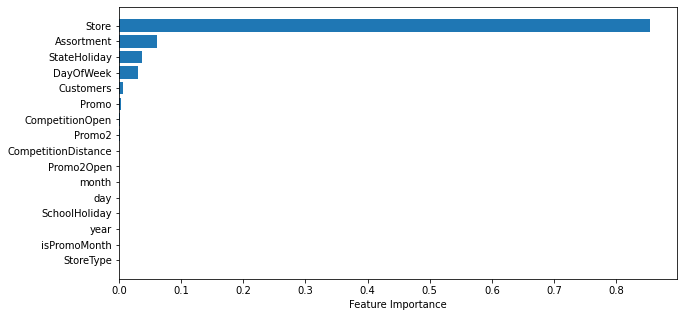

In [ ]:
plt.figure(figsize=(10,5))
sort = rf_random_search.best_estimator_.named_steps["RF"].feature_importances_.argsort()
plt.barh(x.columns[sort], rf_random_search.best_estimator_.named_steps["RF"].feature_importances_[sort])
plt.xlabel("Feature Importance")